In [36]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from logistic import Logistic_Regression, hypothesis

In [37]:
train_df = pd.read_csv('data/train.csv')

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


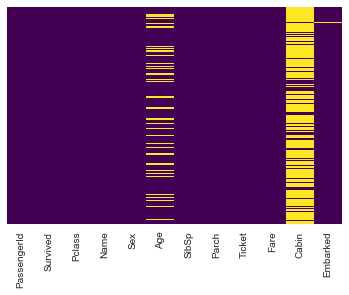

In [39]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

##### Clean null values

In [40]:
pclass_1_mean_age = train_df.groupby(['Pclass']).mean().iloc[0]['Age']
pclass_2_mean_age = train_df.groupby(['Pclass']).mean().iloc[1]['Age']
pclass_3_mean_age = train_df.groupby(['Pclass']).mean().iloc[2]['Age']

In [41]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return pclass_1_mean_age
        elif Pclass == 2:
            return pclass_2_mean_age
        else:
            return pclass_3_mean_age
    else:
        return Age

In [42]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

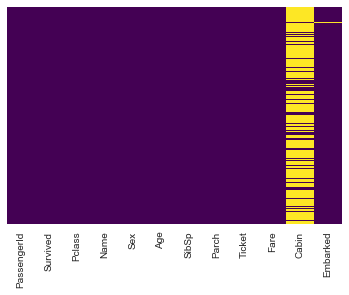

In [43]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [44]:
train_df.drop('Cabin',axis=1,inplace=True)
train_df.dropna(inplace=True)

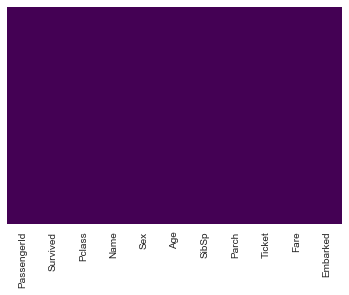

In [45]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

##### Encoded non-numeric features & drop non-relevant columns

In [46]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)
train_df = pd.concat([train_df,sex],axis=1)
train_df.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


##### Set-up Model

In [47]:
y = train_df['Survived'].copy().as_matrix()

In [48]:
X = train_df.drop('Survived',axis=1).as_matrix()

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [50]:
initial_theta = [0,0,0,0,0,0]
alpha = 0.01
iterations = 1000

In [51]:
final_theta = Logistic_Regression(X_train,y_train,alpha,initial_theta,iterations)

In [52]:
final_theta

[-0.28595719020499993,
 0.0090616832190075214,
 -0.53554379936996344,
 -0.13819903460145555,
 0.10152744122176389,
 -0.97631570911052257]

##### Score Model

In [53]:
def score(theta):
    model_score = 0
    length = len(X_test)
    for i in range(length):
        y_prediction = round(hypothesis(theta,X_test[i]))
        y_real = y_test[i]
        if y_prediction == y_real:
            model_score += 1
    score = model_score / length
    print(score)

In [54]:
score(final_theta)

0.717687074829932
